# __Desafío - Naive Bayes__
## Descripción
<ul>
<li>En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de
distintos artistas. Cada uno de los <code>csv</code> se encuentra en la carpeta <code>dump</code> dentro del
proyecto.</li>
<li>Cada <code>csv</code> tiene el nombre del artista a analizar. Los archivos contienen el nombre del
artista, el género musical del artista, el nombre de la canción y las letras.</li>
<li>En base a esta información, se les pide un modelo generativo que pueda predecir el
género de una canción a partir de la letra de una canción.</li>
<li>Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad
trabajaremos con un Multinomial Naive Bayes.</li>
</ul>


## Ejercicio 1: Preparar el ambiente de trabajo
<ul>
<li>Importe los módulos <code>numpy</code>, <code>pandas</code>, <code>matplotlib</code>, <code>seaborn</code>, <code>glob</code> y <code>os</code> siguiendo las
buenas prácticas. Los últimos dos módulos permitirán realizar la importación de
múltiples archivos dentro de la carpeta <code>dump</code>.</li>
<li>Para ello genere un objeto que guarde en una lista todos los archivos alojados en <code>dump</code>
utilizando <code>glob.glob</code> y <code>os.getcwd()</code> para extraer las rutas absolutas. Posteriormente
genere un objeto <code>pd.DataFrame</code> que contenga todos los <code>csv</code>.</li>
<li>Asegúrese de eliminar la columna <code>Unnamed: 0</code> que se genera por defecto.</li>
</ul>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [3]:
paths = glob.glob(os.getcwd() + '/dump/*.csv')
baseDf = pd.DataFrame()
for path in paths:
    artistDf = pd.read_csv(path).drop(columns=['Unnamed: 0'])
    baseDf = pd.concat([baseDf, artistDf])
baseDf.sample()

,0,1,2,3
94,Deicide,metal,Thou Begone,I curse the air you breathe \n All men of the ...


## Ejercicio 2: Descripción de los datos
<ul>
<li>Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman
la siguiente información:
<ul>
<li>La cantidad de canciones registradas por cada artista, ordenados de mayor a
menor.</li>
<li>La cantidad de canciones registradas en cada género, ordenados de mayor a
menor.</li></ul></li>
<li>Comente sobre las principales tendencias.</li>
</ul>


Text(0.5, 1.0, 'Cantidad de canciones según género')

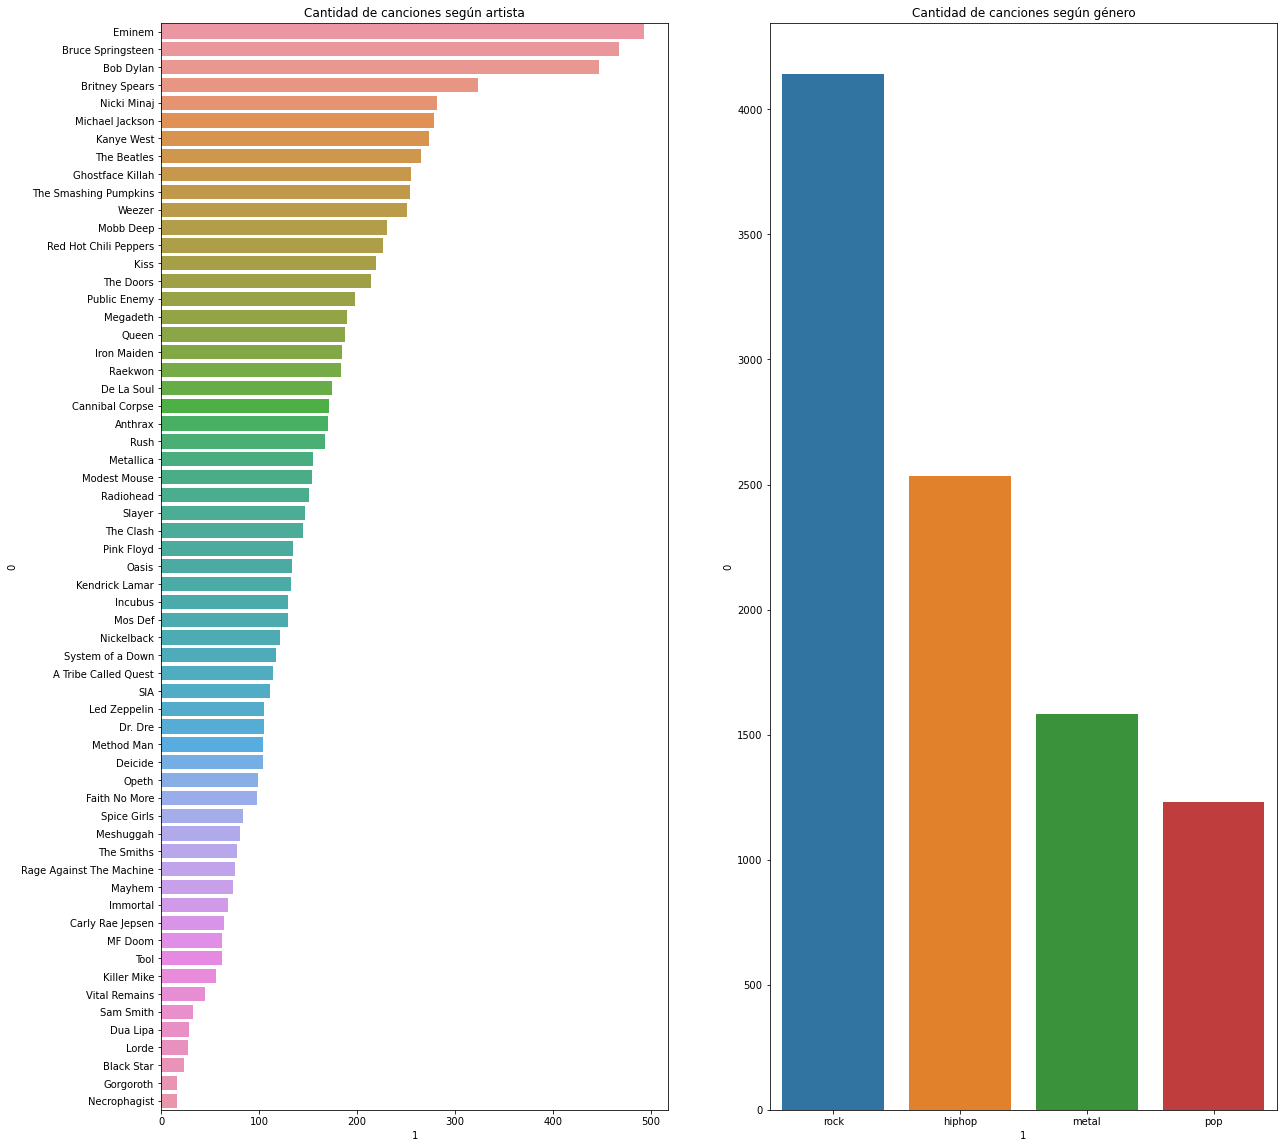

In [4]:
# Generamos los grupos
artistMetrics = baseDf.groupby('0').count().sort_values('1', ascending=False)
genreMetrics = baseDf.groupby('1').count().sort_values('2', ascending=False)
# Generamos los Gráficos
fig, ax= plt.subplots(1,2, figsize=(20, 20))
# Gráfico para agrupación según artista
sns.barplot(y=artistMetrics.index, x=artistMetrics['1'], ax=ax[0])
ax[0].set_title('Cantidad de canciones según artista')
# Gráfico para agrupación según género
sns.barplot(x=genreMetrics.index, y=genreMetrics['0'], ax=ax[1])
ax[1].set_title('Cantidad de canciones según género')

Vemos que hay muchos artistas distintos, lo que complejiza bastante el encoding de esas variables categóricas. Por otro lado, vemos que los generos están desbalanceados, lo que hace mas dificil para el modelo predecir todas las clases con la misma eficacia.

## Ejercicio 3: Matriz de ocurrencias
### Digresión: Tokenización de Textos
Para poder trabajar con textos, debemos pasarlos a una __matriz dispersa__, donde cada fila
representará una entrada (en este caso, una canción), y cada columna __representará una
palabra (token)__. Este es el proceso de tokenización: Identificar la ocurrencia de una palabra
específica dentro de un conjunto de textos (corpus).
<br>

El tokenizador más simple <code>sklearn.feature_extraction.text.CountVectorizer</code> genera
una colección de textos a una matriz que representa la frecuencia __dentro del texto__ de una
palabra específica.
El tokenizador funciona de la siguiente manera:

```python
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
```
<ul>
<li>Importe la clase <code>CountVectorizer</code> dentro de los módulos <code>feature_extraction.text</code>
de la librería <code>sklearn</code>. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de
esta clase?</li>
<li>Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.</li>
<li>Genere una función que replique el procedimiento para cada uno de los géneros.</li>
<li>Comente sobre las principales características de cada género en cuanto a sus palabras.</li>
</ul>


<code>CountVectorizer</code> devuelve una matriz de frecuencia para las palabras de una serie de textos.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(baseDf['3'])
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

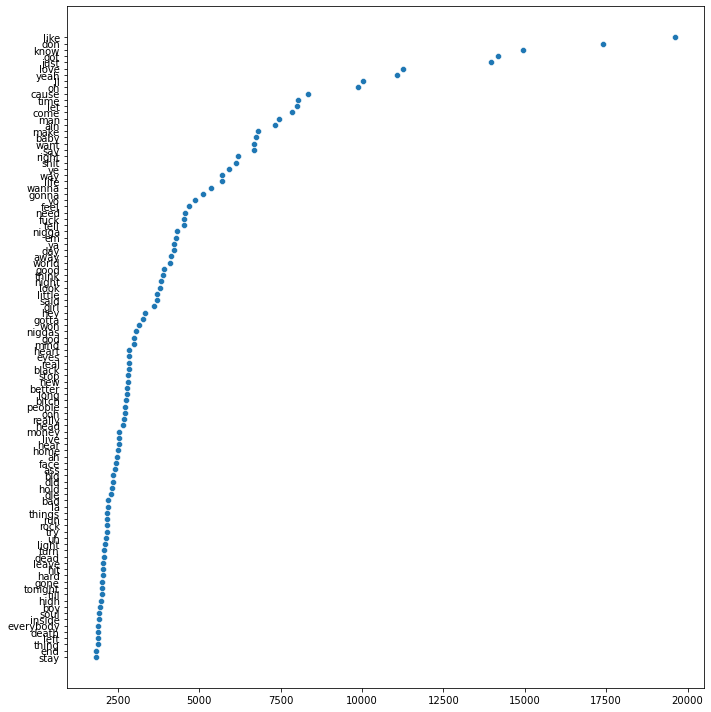

In [6]:
# Generamos una serie de pandas con la cuenta de la matriz
wordFreq = pd.Series(words_freq, index=words).sort_values(ascending=False)
# Mostramos las primeras 100 observaciones
plt.figure(figsize=(10, 10))
sns.scatterplot(x=wordFreq.head(100), y=wordFreq.head(100).index)
plt.tight_layout()
plt.show()

In [7]:
# Creamos la función para extraer el gráfico
def plotWordOcurrences(df, textColname = '3', number = 100, plot=True, label = 'Ocurrences'):
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    count_vectorizer_fit = count_vectorizer.fit_transform(df[textColname])
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
    # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    wordSeries = pd.Series(words_freq, index=words).sort_values(ascending=False)
    if plot:
        # Graficamos
        plt.figure(figsize=(10, 10))
        sns.scatterplot(x=wordSeries.head(number), y=wordSeries.head(number).index)
        plt.title(label)
        plt.tight_layout()
    return wordSeries

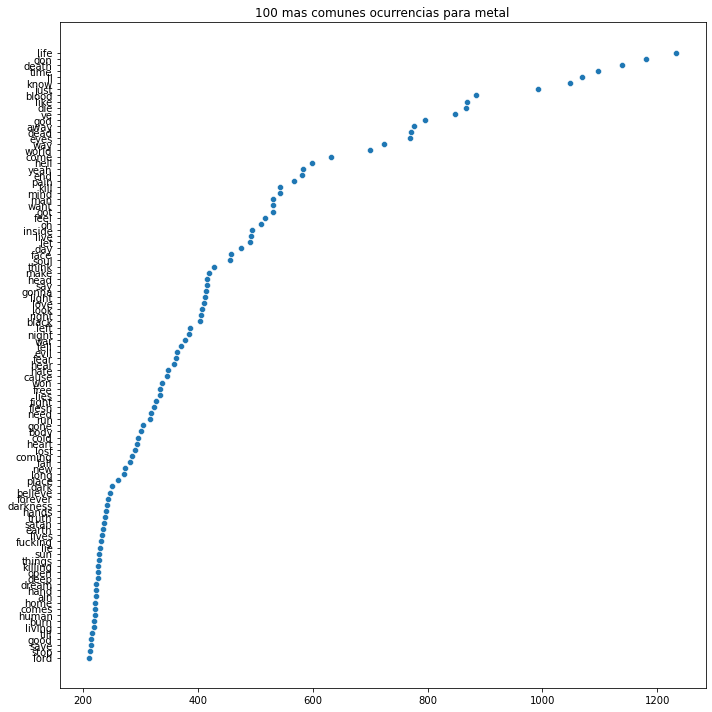

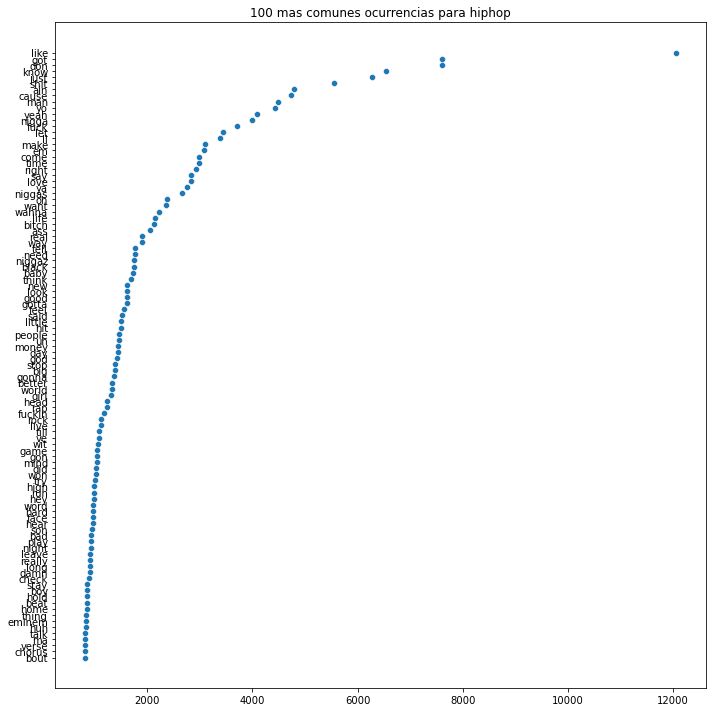

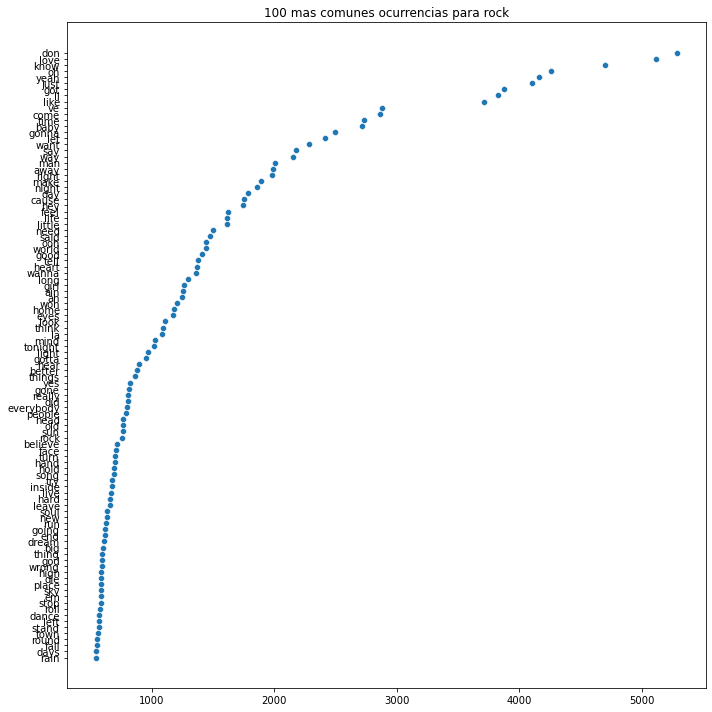

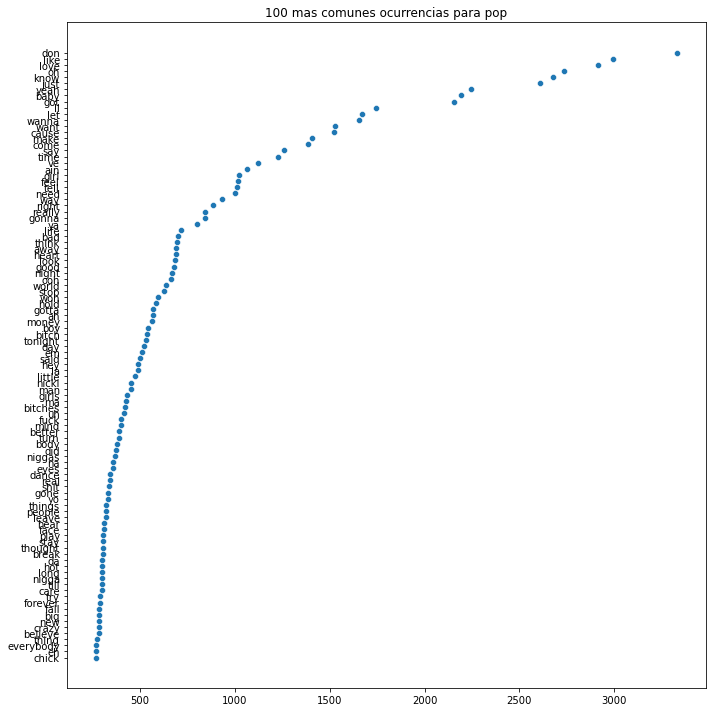

In [8]:
for genre in baseDf['1'].unique():
    plotWordOcurrences(baseDf[baseDf['1'] == genre], label=f'100 mas comunes ocurrencias para {genre}')

Podemos observar que metal es el género mas equilibrado en terminos de variabilidad, pues no se observa ningúna brecha importante entre dos palabras del ranking, no así en hip-hop que la palabra 'like' se repite mucho mas que el resto del ranking, inflenciada fuertemente por eminem.

## Ejercicio 4: Entrenamiento del Modelo
### Digresión: <code>sklearn</code> Pipelines
La clase <code>Pipeline</code> del módulo <code>sklearn.pipeline</code> permite concatenar múltiples pasos de
procesamiento y preprocesamiento en un estimador generado por algún método de
<code>scikit-learn</code>. En sí, la clase cuenta con los métodos clásicos <code>fit</code>, <code>predict</code> y <code>score</code> y
presenta un comportamiento idéntico a los demás objetos de <code>scikit-learn</code>. Uno de los usos
más comunes es para concatenar pasos de preprocesamiento con un modelo.
### Componentes de un <code>Pipeline</code>
Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de
datos, deseo __Estandarizar__, posteriormente __extraer sus principales componentes__ y finalmente
aplicar un modelo de __regresión lineal__. Este flujo se puede reexpresar como:

```python
pipeline_model = Pipeline([('scale', StandardScaler()),
    ('pca', RandomizedPCA(n_components=3)),
    ('model', LinearRegression())])
```
Algunos de los elementos a considerar:
<ol>
<li>Cada paso se considera como una tupla, donde se declara el nombre del paso y la
función a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por
lo que asociamos el método <code>StandardScaler</code> con el string <code>scale</code>.</li>
<li>Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso
representa el orden de ejecución.</li>
</ol>
Posteriormente el objeto creado puede utilizarse con los siguientes métodos

```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)
```
<ul>
<li>Importe <code>MultinomialNB</code>, <code>train_test_split</code>, <code>Pipeline</code>, <code>confusion_matrix</code> y
<code>classification_report</code>.</li>
<li>Genere las muestras de entrenamiento y validación reservando un 40% para validación y
declarando una semilla pseudoaleatoria.</li>
<li>Monte el modelo dentro de un <code>Pipeline</code>, donde el primer paso es implementar
<code>CountVectorizer</code> y el segundo es ejecutar el clasificador <code>MultinomialNB</code>.</li>
<li>A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones
correspondientes?</li>

```python
['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma
Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game
for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move
bitch, get out the way Get out the way bitch, get out the way', # Ludacris
- Move B*tch
'Sexual violence doesn't start and end with rape It starts in our books and
behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm
the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your
shoes when you were hurting\
You are not deserving, you are not deserving" #Banks - Drowning]
```
<li>Genere una predicción implementando la muestra de validación y contraste las
predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.</li>
</ul>

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

songSamples = [
    'I got a place in the underworld', # Brody Dalle - Underworld
    'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
    "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
    'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
    "Sexual violence doesn't start and end with rape It starts in our books and behind our school gates", # IDLES - Mother
    "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \ build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\ You are not deserving, you are not deserving" #Banks - Drowning
]

X_train, X_test, y_train, y_test = train_test_split(baseDf['3'], baseDf['1'], test_size=.4, random_state=19137)

pipeline = Pipeline([('count', CountVectorizer()), ('model', MultinomialNB())])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(songSamples)
print("Las predicciones en orden son:")
print(predictions)

print(classification_report(y_test, pipeline.predict(X_test)))
print(confusion_matrix(y_test, pipeline.predict(X_test)))

Las predicciones en orden son:
['rock' 'metal' 'rock' 'hiphop' 'metal' 'rock']
              precision    recall  f1-score   support

      hiphop       0.85      0.91      0.88      1029
       metal       0.84      0.68      0.75       617
         pop       0.61      0.43      0.51       496
        rock       0.77      0.85      0.81      1654

    accuracy                           0.79      3796
   macro avg       0.77      0.72      0.74      3796
weighted avg       0.78      0.79      0.78      3796

[[ 940    6   23   60]
 [  24  417   12  164]
 [  71    4  214  207]
 [  72   67  101 1414]]


Vemos que el modelo tiene un accuracy bastante bueno pero con el problema de que no puede reconocer correctamentelas canciones pop. Esto se muestra claramente en la matriz de confusión donde hay 214 verdaderos positivos de pop pero también hay 207 casos donde se adivinó rock y era pop. 

## Ejercicio 5: Mejora del Modelo
<ul>
<li>Proponga una estrategia para mejorar el desempeño del modelo en la categoría con
peores métricas.</li>
<li>Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos
datos suministrados.</li>
<li>Comente sobre el desempeño general de este.</li>
</ul>


Para mejorar el rendimiento cambiaremos los pesos de cada clase para equilibrarlos, para esto asumiremos en base a información pública, que la mayoría de las canciones son de Rock, luego Pop y finalmente Hiphop y una baja cantidad de metal.

In [28]:
# Nueva carpeta de canciones
paths = glob.glob(os.getcwd() + '/dump_plus_pop/*.csv')
plusDf = pd.DataFrame()
for path in paths:
    artistDf = pd.read_csv(path).drop(columns=['Unnamed: 0'])
    plusDf = pd.concat([plusDf, artistDf])
plusDf.sample()
# Se prepara el entrenamiento
X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(plusDf['3'], plusDf['1'], test_size=.4, random_state=19137)

balancedPipeline = Pipeline([('count', CountVectorizer()), ('model', MultinomialNB(class_prior=[.15, .10, .20, .35]))])
balancedPipeline.fit(X_train_plus, y_train_plus)
predictions = balancedPipeline.predict(songSamples)
print("Las predicciones en orden son:")
print(predictions)

print(classification_report(y_test_plus, balancedPipeline.predict(X_test_plus)))
print(confusion_matrix(y_test_plus, balancedPipeline.predict(X_test_plus)))

Las predicciones en orden son:
['rock' 'metal' 'pop' 'hiphop' 'metal' 'rock']
              precision    recall  f1-score   support

      hiphop       0.84      0.88      0.86       989
       metal       0.83      0.69      0.76       645
         pop       0.65      0.68      0.66      1020
        rock       0.75      0.76      0.76      1668

    accuracy                           0.76      4322
   macro avg       0.77      0.75      0.76      4322
weighted avg       0.76      0.76      0.76      4322

[[ 870    8   69   42]
 [  17  447   37  144]
 [  94    5  692  229]
 [  54   76  267 1271]]


Se ve que el nuevo modelo en si tiene menos <code>accuracy</code>, pero tiene una mejor capacidad de reconocer y no fallar en la clase Pop. Vemos también que el nuevo modelo tenía mas ejemplos de canciones pop, lo que mejoró el modelo en sus bases.